In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [3]:
from keras.utils import to_categorical

X_train = X_train.reshape((60000, 28, 28))
X_train = X_train.astype('float32') / 255

X_train = X_test.reshape((10000, 28, 28))
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
from keras.layers.serialization import activation
from keras import layers,models

model = models.Sequential()
model.add(layers.Conv2D(filters=32 ,kernel_size=(3,3), input_shape= (28, 28, 1), activation= "relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [5]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_test, y_test, epochs=40, batch_size=64, validation_split=0.2)

Epoch 1/40
125/125 [==============================] - 5s 11ms/step - loss: 1.2959 - accuracy: 0.5620 - val_loss: 0.4192 - val_accuracy: 0.8875
Epoch 2/40
125/125 [==============================] - 2s 16ms/step - loss: 0.5424 - accuracy: 0.8313 - val_loss: 0.2151 - val_accuracy: 0.9310
Epoch 3/40
125/125 [==============================] - 1s 9ms/step - loss: 0.3541 - accuracy: 0.8885 - val_loss: 0.1526 - val_accuracy: 0.9535
Epoch 4/40
125/125 [==============================] - 1s 9ms/step - loss: 0.2779 - accuracy: 0.9172 - val_loss: 0.1135 - val_accuracy: 0.9585
Epoch 5/40
125/125 [==============================] - 1s 7ms/step - loss: 0.2287 - accuracy: 0.9314 - val_loss: 0.0821 - val_accuracy: 0.9745
Epoch 6/40
125/125 [==============================] - 1s 10ms/step - loss: 0.1871 - accuracy: 0.9429 - val_loss: 0.1018 - val_accuracy: 0.9685
Epoch 7/40
125/125 [==============================] - 1s 8ms/step - loss: 0.1584 - accuracy: 0.9535 - val_loss: 0.1183 - val_accuracy: 0.9620
Epo

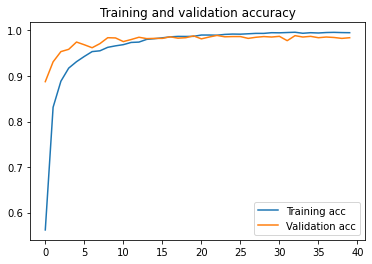

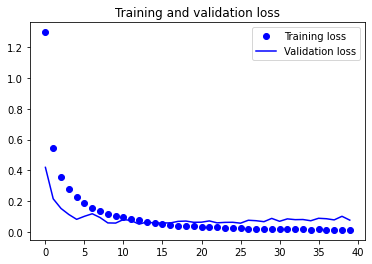

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0163 - accuracy: 0.9964


[0.016299379989504814, 0.996399998664856]